# Math 271.1: Exercise 1 (#3)

### INSTRUCTION: <br>

Given matrix A = [[2, 1], [1, 3]], we need to: <br>

(a): Prove that the ℓ₁-unit ball in ℝ² is the diamond {(x,y)ᵀ : |x| + |y| = 1} <br>
(b): Show that v(θ) = (1/(|cos θ| + |sin θ|)) * [cos θ, sin θ]ᵀ are unit vectors in ℓ₁-norm <br>
(c): Sample 1000 unit vectors v(θ), 
- compute ||Av(θ)||₁, 
- and estimate ||A||₁

(d): Visualize the ℓ₁-unit ball with sampled vectors and the transformed set {Av(θ)} <br>
(e): Compare estimate with analytical result using norm(A,1) <br>

### Main Data Structure / Variables

- ***Array/Matrix***:
    - **A**: represents the given `matrix [[2,1], [1,3]]`
    - **theta_samples**: θ values within [0, 2pi] for sampling
    - **cos_theta**: cos(θ) values for each sampled θ
    - **sin_theta**: sin(θ) values for each sampled θ
    - **normalizer**: |cos(θ)| + |sin(θ)| for normalization <br><br>
    - **v_vectors**: unit vectors v(θ) on l<sub>1</sub>-unit ball
    - **Av_vectors**: transformed vectors v(θ) on A*v(θ)
    - **Av_l1_norms**: ||Av(θ)||₁ for each sample
    - **l1_norms_check**: array for verification that ||v(θ)||<sub>1</sub> = 1<br><br>
    - **col_sums**: array to hold absolute column sums 
    - **diamond_x**: array for x-coordinates of diamond vertices
    - **diamond_y**: array for y-coordinates of diamond vertices
- ***Int***:
    - **n_samples**: int - number of θ values to sample, which is 1000
    - **max_index**: index for the max norm
- ***Floating-point***:
    - **estimated_A_norm**: max value from Av_l1_norms
    - **analytical_A_norm**: true ||A||<sub>1</sub> computed using column sum formula
    - **numpy_A_norm**: ||A||<sub>1</sub> computed using np.linalg.norm(A, 1) for verification<br><br>
    - **error**: absolute difference |estimated_A_norm - analytical_A_norm|
    - **relative_error**: percentage error (error/analytical_A_norm) × 100


### Pseudocode

- Show |x| + |y| = 1 by creating 4 line segments in each quadrant connecting the vertices of the diamond
- Generate theta_samples
- Generate **cos_theta** and **sin_theta** using list comprehension
- Generate normalizer using list comprehension
- Create v_vectors 
- Generate Av_vectors using matrix multiplication
- Use **'for-loop'** for norm computation since we need l<sub>1</sub>-norm for each transformed vector
- Use **'for-loop'** to find maximum norm and corresponding index
    - In every iteration, compare current norm with running maximum
    - Track index of vector achieving maximum 
- Compute analytical result
- Compare estimated vs analytical for accuracy
- Visualize using matplotlib

### Step by step breakdown of logic: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

#### Configure Matplotlib setup to avoid repetition

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['legend.framealpha'] = 0.9

### 3a - Proving ℓ₁-unit ball is diamond |x| + |y| = 1:
---

3a - Proving ℓ₁-unit ball is diamond |x| + |y| = 1:

- By definition: ℓ₁-unit ball = {(x,y) : ||v||₁ ≤ 1} = {(x,y) : |x| + |y| ≤ 1}
- The unit sphere boundary is: |x| + |y| = 1
- This forms a diamond because each quadrant shows:

  **Quadrant I** `(x ≥ 0, y ≥ 0)`: 
  `|x| + |y| = x + y = 1`  →  line from (1,0) to (0,1)
  
  **Quadrant II** `(x ≤ 0, y ≥ 0)`: 
  |`x| + |y| = -x + y = 1`  →  line from (0,1) to (-1,0)
  
  **Quadrant III** `(x ≤ 0, y ≤ 0)`: 
  `|x| + |y| = -x - y = 1`  →  line from (-1,0) to (0,-1)
  
  **Quadrant IV** `(x ≥ 0, y ≤ 0)`: 
  `|x| + |y| = x - y = 1`  →  line from (0,-1) to (1,0)

- These 4 line segments connect to form a diamond with vertices at (±1,0) and (0,±1)

Therefore, the ℓ₁-unit ball is the diamond {(x,y) : |x| + |y| = 1}. ∎

---

##### Initialize the diamond vertices:

In [3]:
diamond_x = [1, 0, -1, 0, 1]
diamond_y = [0, 1, 0, -1, 0]

print("Diamond vertices (x, y):")
print(list(zip(diamond_x, diamond_y)))

Diamond vertices (x, y):
[(1, 0), (0, 1), (-1, 0), (0, -1), (1, 0)]


#### Plot the diamond shape:

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


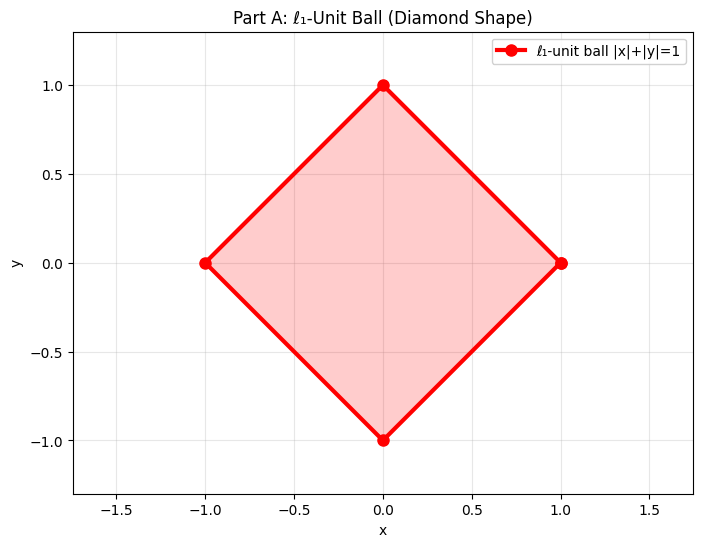

In [4]:
plt.figure()
plt.plot(diamond_x, diamond_y, 'r-', linewidth=3, marker='o', markersize=8, label='ℓ₁-unit ball |x|+|y|=1')
plt.fill(diamond_x[:-1], diamond_y[:-1], alpha=0.2, color='red')
plt.axis('equal')
plt.xlim(-1.3, 1.3)
plt.ylim(-1.3, 1.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Part A: ℓ₁-Unit Ball (Diamond Shape)')
plt.legend()
plt.show()

### 3b - Verification that v(θ) are unit vectors:
---

**Given:** 
v(θ) = (1 / (|cos θ| + |sin θ|)) * [cos θ, sin θ]ᵀ,  where θ ∈ [0, 2π]

**To Prove:** 
v(θ) are unit vectors in ℓ₁-norm.

**Proof:**
We need to show that ||v(θ)||₁ = 1 for all θ in [0, 2π].

- `(cos θ, sin θ)`: gives us all directions<br>
- Since (cos θ, sin θ) has l<sub>2</sub>-norm = 1, not l<sub>1</sub>-norm = 1, we need to transform it by dividing it by its l<sub>1</sub>-norm 
    - `v(θ) = [cos θ / (|cos θ| + |sin θ|), sin θ / (|cos θ| + |sin θ|)]`
<br><br>

- Calculate the ℓ₁-norm
    - `||v(θ)||₁ = |cos θ / (|cos θ| + |sin θ|)| + |sin θ / (|cos θ| + |sin θ|)|`
<br><br>

- Since `|cos θ| + |sin θ|` is always positive (cos(θ) and sin(θ) can't both be zero), we can simplify by getting the absolute value: 
    - `||v(θ)||₁ = |cos θ| / (|cos θ| + |sin θ|) + |sin θ| / (|cos θ| + |sin θ|)`
<br>

- Combine the fractions because they have the same denominator:
    - `||v(θ)||₁ = (|cos θ| + |sin θ|) / (|cos θ| + |sin θ|)`
<br><br>

- This simplifies to:
`||v(θ)||₁ = 1`

Therefore, v(θ) are unit vectors in ℓ₁-norm. ∎

---

#### Generate test theta samples

In [5]:
test_thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
print("Testing specific θ values:")

test_v_vectors = []
for i, theta in enumerate(test_thetas):
    cos_val = np.cos(theta)
    sin_val = np.sin(theta)
    normalizer = abs(cos_val) + abs(sin_val)

    v_test = [cos_val/normalizer, sin_val/normalizer]
    norm_test = abs(v_test[0]) + abs(v_test[1])

    test_v_vectors.append(v_test)
    print(f"  θ = {theta:.3f}: v = [{v_test[0]:6.3f}, {v_test[1]:6.3f}], ||v||₁ = {norm_test:.6f}")


Testing specific θ values:
  θ = 0.000: v = [ 1.000,  0.000], ||v||₁ = 1.000000
  θ = 0.785: v = [ 0.500,  0.500], ||v||₁ = 1.000000
  θ = 1.571: v = [ 0.000,  1.000], ||v||₁ = 1.000000
  θ = 2.356: v = [-0.500,  0.500], ||v||₁ = 1.000000
  θ = 3.142: v = [-1.000,  0.000], ||v||₁ = 1.000000
  θ = 3.927: v = [-0.500, -0.500], ||v||₁ = 1.000000
  θ = 4.712: v = [-0.000, -1.000], ||v||₁ = 1.000000
  θ = 5.498: v = [ 0.500, -0.500], ||v||₁ = 1.000000


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


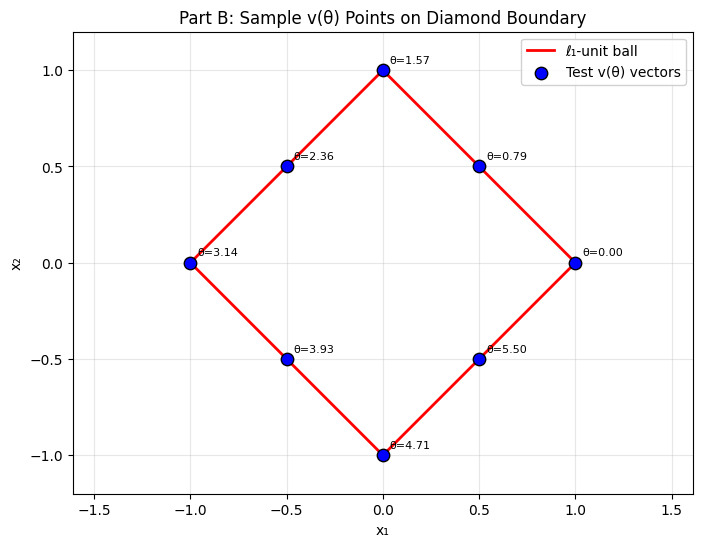

In [6]:
# Draws the diamon boundary
plt.figure()
plt.plot(diamond_x, diamond_y, 'r-', linewidth=2, label='ℓ₁-unit ball')

# Plot test vectors
test_v_array = np.array(test_v_vectors)
plt.scatter(test_v_array[:, 0], test_v_array[:, 1],
           color='blue', s=80, marker='o', edgecolor='black',
           label='Test v(θ) vectors', zorder=5)

# Add labels
for i, (theta, v) in enumerate(zip(test_thetas, test_v_vectors)):
    plt.annotate(f'θ={theta:.2f}', (v[0], v[1]), xytext=(5, 5),
                textcoords='offset points', fontsize=8)

plt.axis('equal')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Part B: Sample v(θ) Points on Diamond Boundary')
plt.legend()
plt.show()
print()

### 3c - Sampling and Transformation:
---

#### Set parameters and define the matrix

In [7]:
n_samples = 1000
np.random.seed(42)

A = np.array([[2, 1], [1, 3]], dtype=float)
print("Matrix A:\n", A)

# Generate theta_samples from uniform distribution [0, 2π]
# We use the numpy random uniform function to generate the samples with equal probability for each angle
theta_samples = np.random.uniform(0, 2*np.pi, n_samples)

Matrix A:
 [[2. 1.]
 [1. 3.]]


#### Generated cos(θ) and sin(θ) 

Use list comprehension from the `theta_sample` we randomly generated

In [8]:
cos_theta = [np.cos(theta) for theta in theta_samples]
sin_theta = [np.sin(theta) for theta in theta_samples]

#### Generate normalizer 

We need normalizer because sampling θ uniformly from `[0, 2π]` and then compute`(cos(0), sin(0))`, the points we get on the l<sub>2</sub>-unit circle, not l<sub>1</sub>-unit ball, which will give us wrong matrix norm.


In [9]:
normalizer = [abs(cos_val) + abs(sin_val) for cos_val, sin_val in zip(cos_theta, sin_theta)]

We use `zip()` to pair up cos_theta/sin_theta with the normalizer. <br>
The `column_stack` will place these normalized sin and cos values as columns in 2D array.

In [10]:
cos_normalized = [cos_val/norm_val for cos_val, norm_val in zip(cos_theta, normalizer)]
sin_normalized = [sin_val/norm_val for sin_val, norm_val in zip(sin_theta, normalizer)]
v_vectors = np.column_stack([cos_normalized, sin_normalized]) # v_vectors becomes a matrix

print("Unit Vector Sampling:\n")
for i in v_vectors[:10]: # print first 10 vectors
    print(f"  {i}")
print()

Unit Vector Sampling:

  [-0.49855524  0.50144476]
  [ 0.75759588 -0.24240412]
  [-0.10202809 -0.89797191]
  [-0.58351832 -0.41648168]
  [0.40129919 0.59870081]
  [0.40137792 0.59862208]
  [0.72355504 0.27644496]
  [ 0.47225061 -0.52774939]
  [-0.57560536 -0.42439464]
  [-0.21241608 -0.78758392]



#### Verify all are unit vectors

Performing row-wise sum per vector so we can get the L1 norm for each. <br>
Numpy's `allclose` helps in checking whether the `l1_norms_check` is approximately equal to `1.0`

In [11]:
l1_norms_check = np.sum(np.abs(v_vectors), axis=1)

print(f"Verification: all ||v(θ)||₁ = 1? {np.allclose(l1_norms_check, 1.0)}")
print()


Verification: all ||v(θ)||₁ = 1? True



#### Generate Av_vectors 

Using matrix multiplication A @ v_vectors.T, which is basically now our transformed vectors 

In [12]:
# Applied matrix A to v_vectors
Av_vectors = (A @ v_vectors.T).T # Tranformed ve

print(f"Generated Av_vectors using matrix multiplication, shape: {Av_vectors.shape}")
print(Av_vectors)


Generated Av_vectors using matrix multiplication, shape: (1000, 2)
[[-0.49566571  1.00577905]
 [ 1.27278763  0.03038351]
 [-1.10202809 -2.79594382]
 ...
 [ 1.46280228  2.07439545]
 [ 1.26710809  0.02281079]
 [-1.21745928  0.04338763]]


#### Compute ℓ₁ norms of all transformed vectors Av(θ)

We do this so we can take the maximum of those values and approximate the induced L<sub>1</sub> matrix norm of A. 

In [13]:
Av_l1_norms = np.sum(np.abs(Av_vectors), axis=1) # Compute ℓ₁ norms of all transformed vectors Av(θ)

print("Sample |Av(θ)||₁ values:\n")
for i in range(10):
    print(f"||Av(θ_{i})||₁ = {Av_l1_norms[i]:.6f}")
print()

Sample |Av(θ)||₁ values:

||Av(θ_0)||₁ = 1.501445
||Av(θ_1)||₁ = 1.303171
||Av(θ_2)||₁ = 3.897972
||Av(θ_3)||₁ = 3.416482
||Av(θ_4)||₁ = 3.598701
||Av(θ_5)||₁ = 3.598622
||Av(θ_6)||₁ = 3.276445
||Av(θ_7)||₁ = 1.527749
||Av(θ_8)||₁ = 3.424395
||Av(θ_9)||₁ = 3.787584



#### Estimate ||A||₁ 
We estimate the inducted matrix norm, which is basically the largest values from that L<sub>1</sub> norm of the transformed vector.

In [14]:
estimated_A_norm = np.max(Av_l1_norms)
print(f"Estimated ||A||₁ = max ||Av(θ)||₁ = {estimated_A_norm:.6f}")

Estimated ||A||₁ = max ||Av(θ)||₁ = 3.999752


### 3d - Visualize:
---

#### Plot all sampled v(θ) points on diamond

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


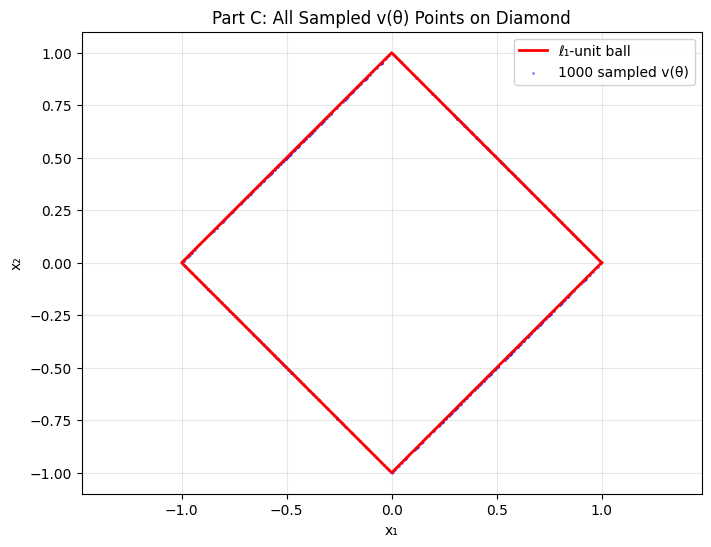

✓ Sampling visualization complete



In [15]:
plt.figure()
plt.plot(diamond_x, diamond_y, 'r-', linewidth=2, label='ℓ₁-unit ball')
plt.scatter(v_vectors[:, 0], v_vectors[:, 1], alpha=0.4, s=1, c='blue', label=f'{n_samples} sampled v(θ)')
plt.axis('equal')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Part C: All Sampled v(θ) Points on Diamond')
plt.legend()
plt.show()
print("✓ Sampling visualization complete")
print()

#### Plot transformed vectors {Av(θ)}

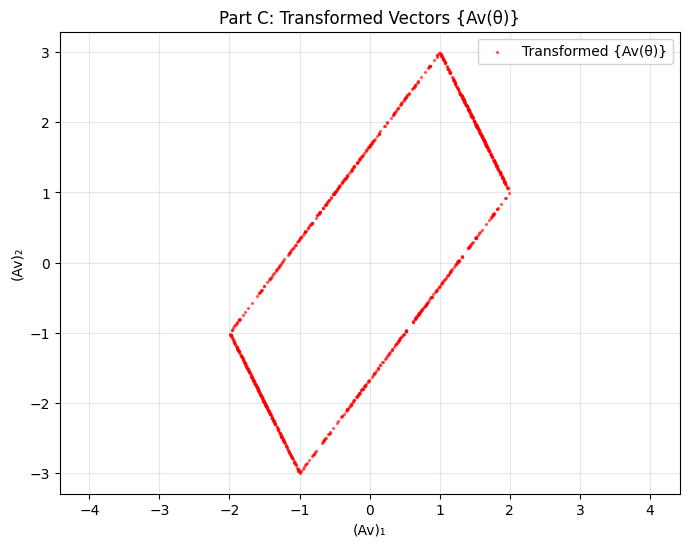

In [16]:
plt.figure()
plt.scatter(Av_vectors[:, 0], Av_vectors[:, 1], alpha=0.5, s=2, c='red', label='Transformed {Av(θ)}')
plt.axis('equal')
plt.xlabel('(Av)₁')
plt.ylabel('(Av)₂')
plt.title('Part C: Transformed Vectors {Av(θ)}')
plt.legend()
plt.show()
print()

### 3e - Compare:
---

Numpy's `linalg` (Linear Algebra) computes the induced matrix 1-norm, by applying this to the matrix, we can get the Exact value and compare it with the estimated value. 

In [17]:
# Your estimate from sampling
estimated_A_norm = np.max(Av_l1_norms)

# Exact induced L1 norm (maximum column sum)
exact_A_norm = np.linalg.norm(A, 1)

print(f"Estimated ||A||₁ = {estimated_A_norm:.6f}")
print(f"Exact ||A||₁     = {exact_A_norm:.6f}\n")

Estimated ||A||₁ = 3.999752
Exact ||A||₁     = 4.000000



`allclose` computes if the value match within tolerance. 

Relative tolerance (rtol) = `1e-05` <br>
Absolute tolerance (atol) = `1e-08`

In [18]:
print(f"Approximately the same? {np.allclose(estimated_A_norm, exact_A_norm)}")
print(f"Difference:  {abs(estimated_A_norm - exact_A_norm)}")

Approximately the same? False
Difference:  0.00024831013895276755


### References:

[1] https://www.researchgate.net/figure/Unit-ball-representation-of-a-l-norm-b-l-2-norm-c-l-1-norm-d-l-1-2-norm-and-e_fig2_357177123 <br>
[2] https://mathoverflow.net/questions/1464/euclidean-volume-of-the-unit-ball-of-matrices-under-the-matrix-norm<br>
[3] https://www.cs.utexas.edu/~flame/laff/alaff/chapter01-unit-ball.html<br>
[4] https://numpy.org/doc/stable/reference/generated/numpy.allclose.html#numpy-allclose <br>
[5] https://www.khanacademy.org/math/linear-algebra/matrix-transformations/linear-transformations/v/matrix-vector-products-as-linear-transformations <br>

[6]https://docs.python.org/3/tutorial/datastructures.html<br>
[7] https://numpy.org/doc/stable/user/basics.creation.html <br>
[8] https://matplotlib.org/stable/tutorials/pyplot.html <br>
[9] https://docs.python.org/3/library/functions.html#zip